## Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

Problem: Predict purchase amount

### import modules

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


### Load the data set

In [5]:
friday_sale = pd.read_csv('D:\Dekstop\Black friday sale.csv')
friday_sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# No of columns and rows in the dataset
friday_sale.shape

(550068, 12)

In [7]:
#data information
friday_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# Find the unique value in the data set
friday_sale.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

### EDA


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

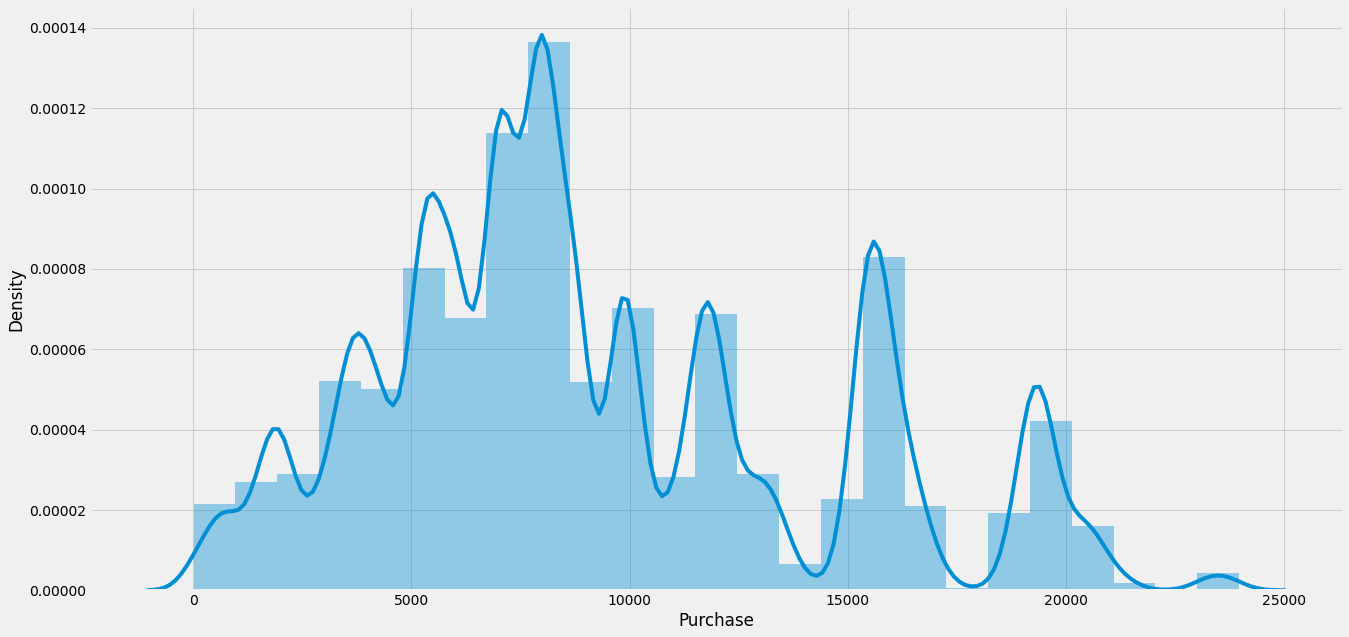

In [9]:
#Display for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.distplot(friday_sale['Purchase'],bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

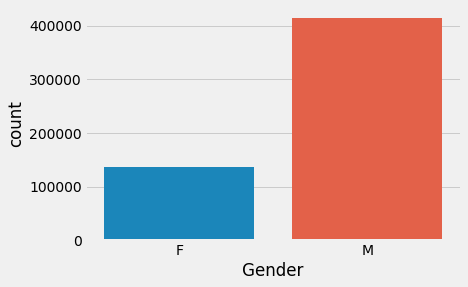

In [10]:
#Distribution of numeric variable ( Univariate variable)
sns.countplot(friday_sale['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

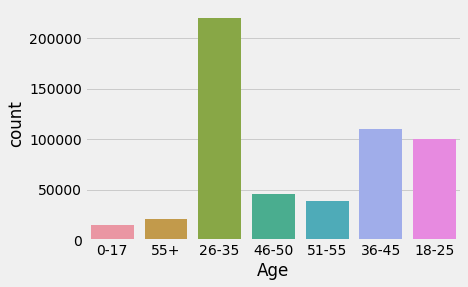

In [11]:
sns.countplot(friday_sale['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

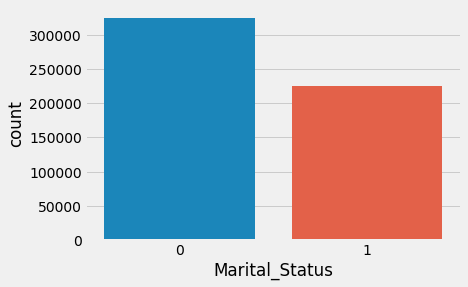

In [12]:
sns.countplot(friday_sale['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

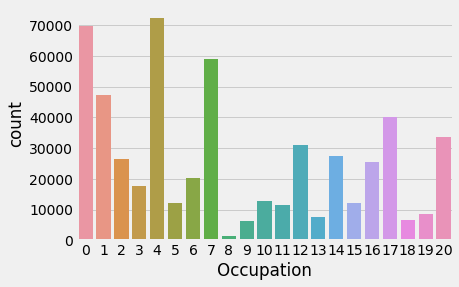

In [13]:
sns.countplot(friday_sale['Occupation'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

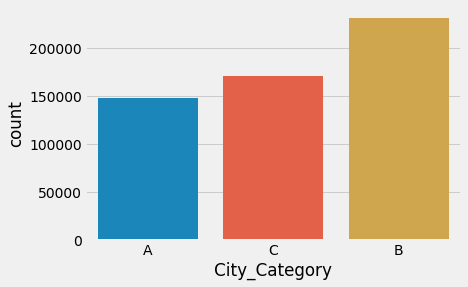

In [14]:
sns.countplot(friday_sale['City_Category'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

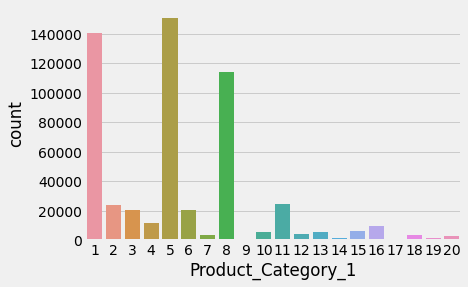

In [15]:
sns.countplot(friday_sale['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

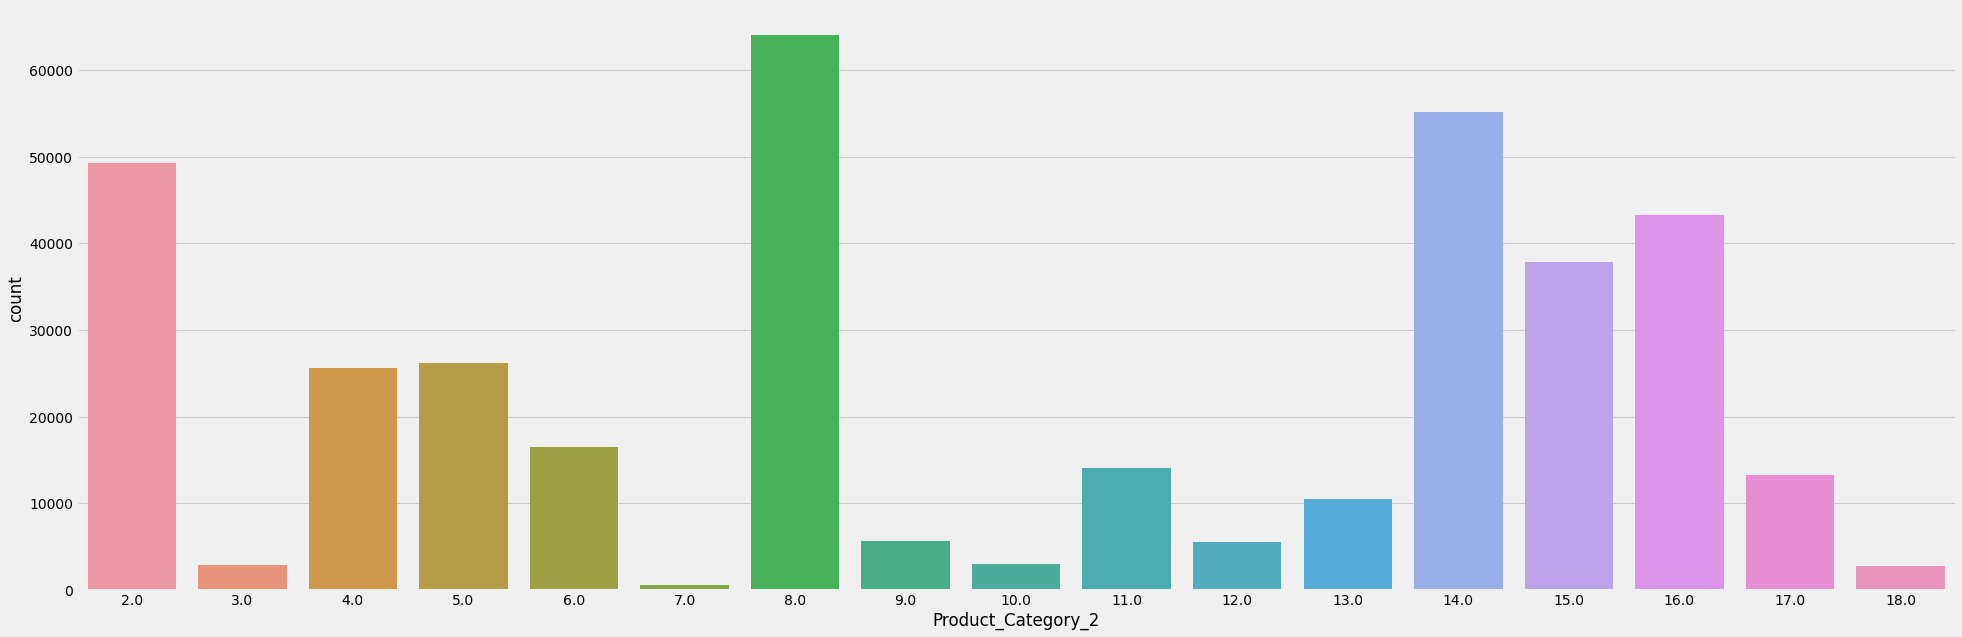

In [16]:
plt.figure(figsize=(30,10))
sns.countplot(friday_sale['Product_Category_2'])


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

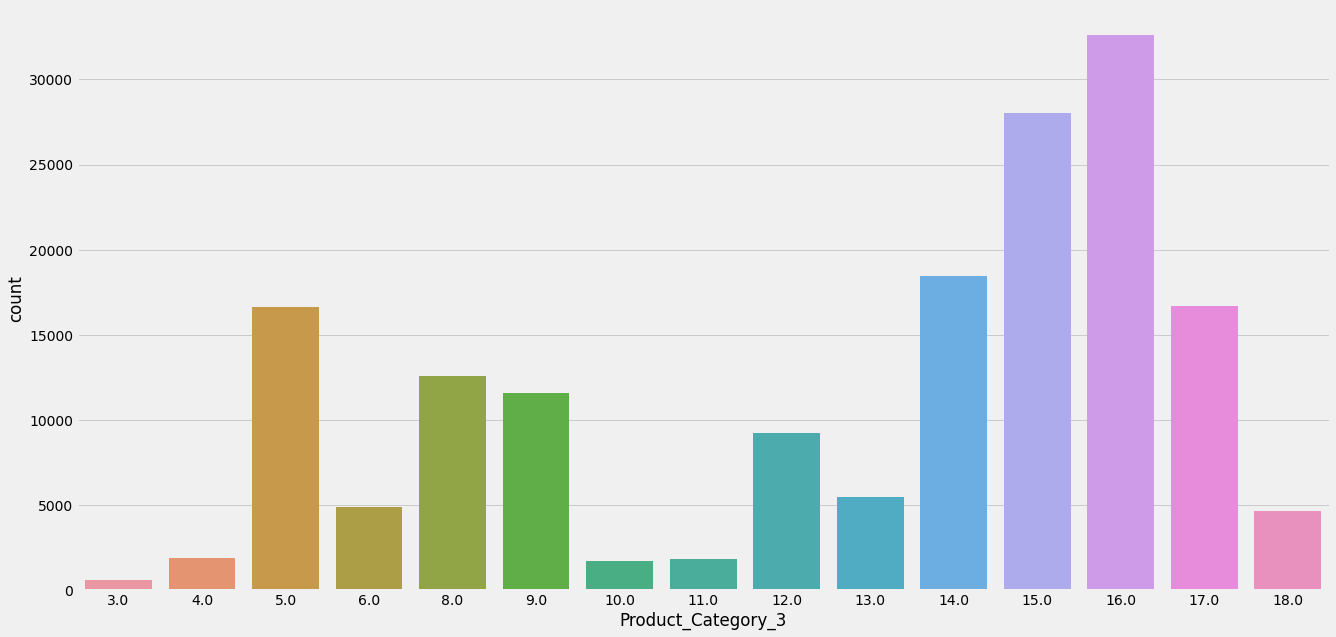

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(friday_sale['Product_Category_3'])


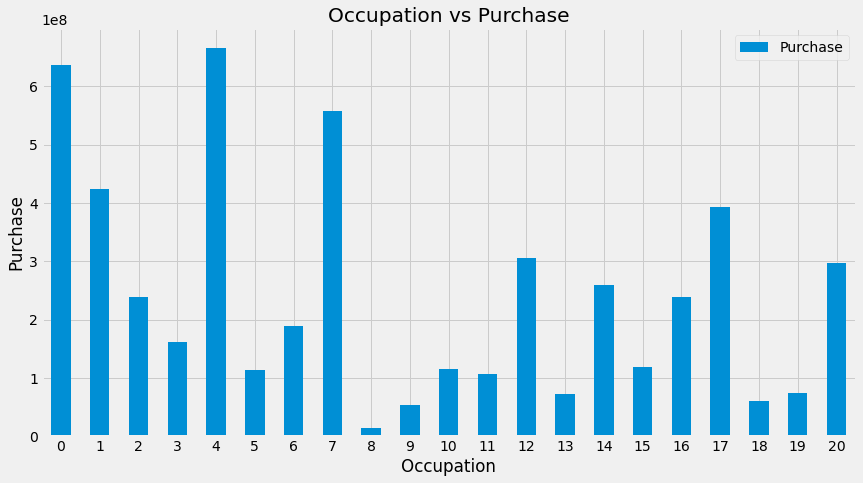

In [18]:
#Bivariant analysys
Occupation_plot = friday_sale.pivot_table(index='Occupation',values = 'Purchase',aggfunc=np.sum) #insted of mean = sum
Occupation_plot.plot ( kind='bar',figsize=(13,7))
plt.xticks(rotation=0)
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation vs Purchase' )
plt.show()


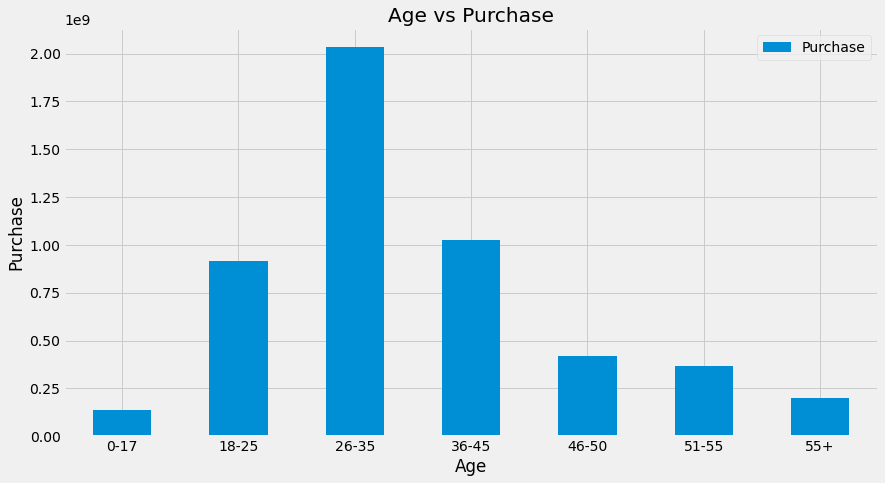

In [19]:
Age = friday_sale.pivot_table(index='Age',values = 'Purchase',aggfunc=np.sum) #insted of mean = sum
Age.plot ( kind='bar',figsize=(13,7))
plt.xticks(rotation=0)
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age vs Purchase' )
plt.show()

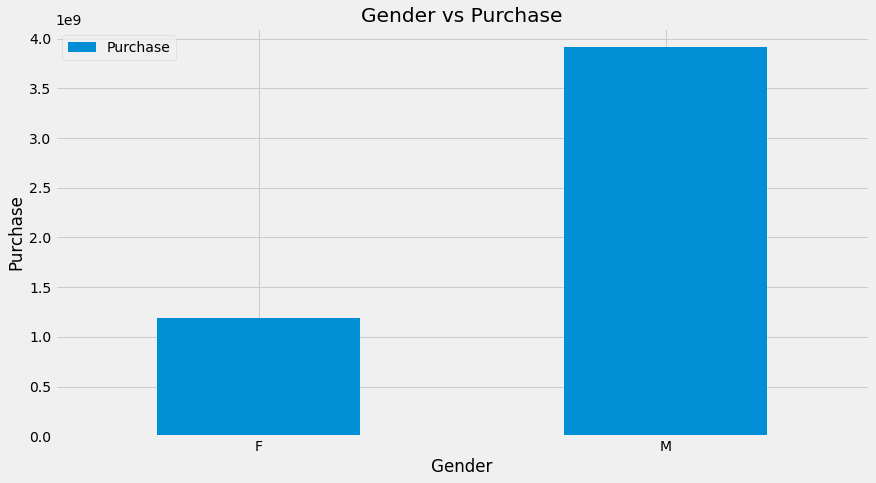

In [20]:
Gender = friday_sale.pivot_table(index='Gender',values = 'Purchase',aggfunc=np.sum) #insted of mean = sum
Gender.plot ( kind='bar',figsize=(13,7))
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Gender vs Purchase' )
plt.show()

#### Same as the above plot graphs for all variables

### Preprocessing the dataset

In [21]:
# Find the null values in the data set
friday_sale.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [22]:
#fill the null values with the value of mean
friday_sale['Product_Category_2'].fillna(friday_sale['Product_Category_2'].mean(),inplace=True)
friday_sale['Product_Category_3'].fillna(friday_sale['Product_Category_3'].mean(),inplace=True)

In [23]:
friday_sale.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [24]:
friday_sale.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200


In [25]:
friday_sale.replace({'Gender':{'M':0,'F':1}},inplace=True)

friday_sale.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [26]:
friday_sale.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,0,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,1,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,1,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,1,55+,1,C,2,0,20,9.842329,12.668243,365
550067,1006039,P00371644,1,46-50,0,B,4+,1,20,9.842329,12.668243,490


In [27]:
# to improve the metric use onehot encoding
#label encoding
cols=['Age','City_Category','Stay_In_Current_City_Years']
le=LabelEncoder()
for col in cols:
    friday_sale[col]=le.fit_transform(friday_sale[col])
friday_sale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,1,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,1,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,1,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,0,6,16,2,4,0,8,9.842329,12.668243,7969


In [28]:
corr = friday_sale.corr() 

<AxesSubplot:>

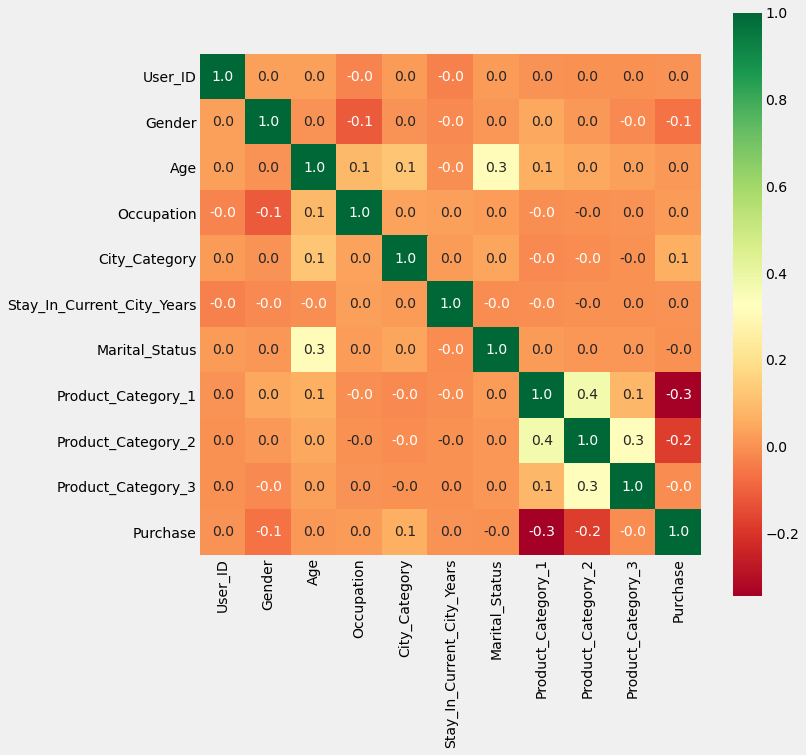

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='RdYlGn')

### Slit the input data

In [30]:
x = friday_sale.drop(columns=['User_ID','Product_ID','Purchase'])
y = friday_sale['Purchase']

In [31]:
#split the train test data
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Results
MSE: 4684.550166044552
CV Score: 4691.912069110221


<AxesSubplot:title={'center':'Model Coefficients'}>

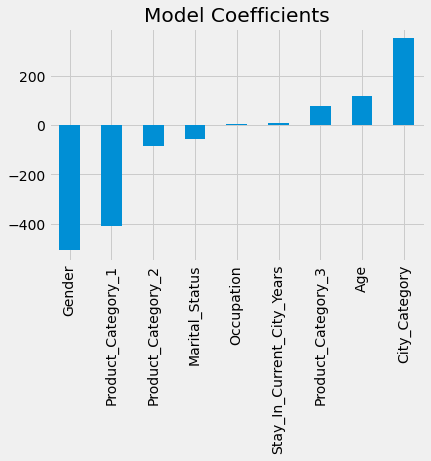

In [32]:
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3362.1715635132878
CV Score: 3338.0565685089105


<AxesSubplot:title={'center':'feature_importances'}>

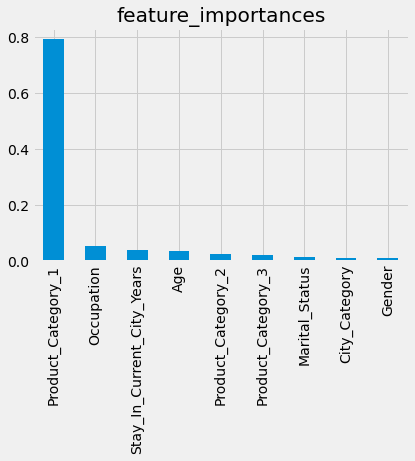

In [33]:
model=DecisionTreeRegressor()
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar',title='feature_importances')

Results
MSE: 4684.550166044551
CV Score: 4691.912069110219


<AxesSubplot:title={'center':'Model coefficiant'}>

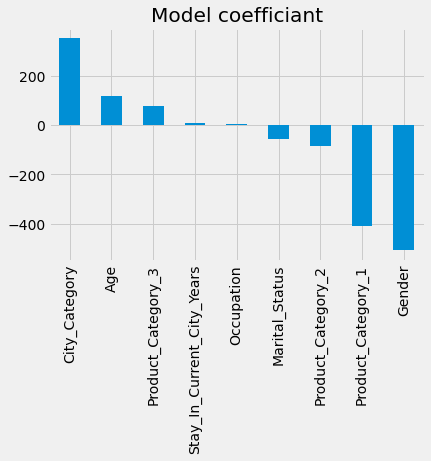

In [34]:
model=LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Model coefficiant')

Results
MSE: 3061.1622785236077
CV Score: 3052.3705199854367


<AxesSubplot:title={'center':'Feature Importance'}>

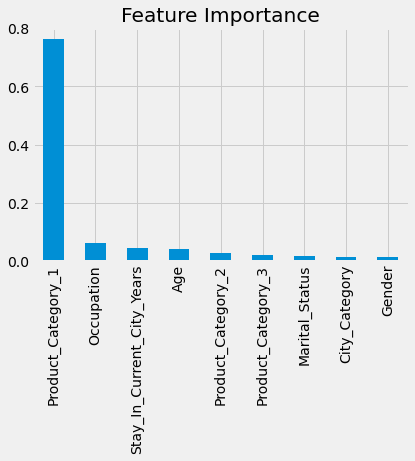

In [35]:


model = RandomForestRegressor(n_jobs=-1)
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 3189.05962921564
CV Score: 3176.226539771018


<AxesSubplot:title={'center':'Feature Importance'}>

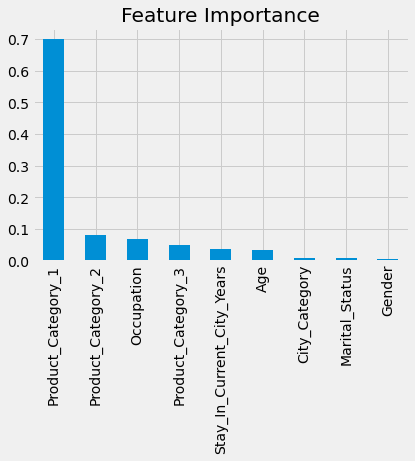

In [36]:
model = ExtraTreesRegressor(n_jobs=-1)
train(model, x, y)
features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [41]:
predict = model.predict(x_test)

NameError: name 'x_test' is not defined

In [42]:
submission = pd.DataFrame()
submission['User_ID'] = x_test['User_ID']
submission['Purchase'] = pred

NameError: name 'x_test' is not defined

In [43]:
submission.to_csv('submission.csv', index=False)